# Data Analysis

Let's analyse the data of the matchin making from DES with VIPERS and VVDF

## Setup do Google Colab


In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/zxcorr/zxcorr_DataAccess/main/DESzxcorr/pycode/astroFunctions.py -O astroFunctions.py
    ! pip install esutil
    import astroFunctions as astro

Baixando Funções que serão usadas nesse notebook
shred: astroFunctions.py: failed to open for writing: No such file or directory
--2020-10-30 22:54:35--  https://raw.githubusercontent.com/zxcorr/zxcorr_DataAccess/main/DESzxcorr/pycode/astroFunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1696 (1.7K) [text/plain]
Saving to: ‘astroFunctions.py’

astroFunctions.py   100%[===================>]   1.66K  --.-KB/s    in 0s      

2020-10-30 22:54:35 (24.7 MB/s) - ‘astroFunctions.py’ saved [1696/1696]

     |████████████████████████████████| 337kB 2.8MB/s 
  Created wheel for esutil: filename=esutil-0.6.5-cp36-cp36m-linux_x86_64.whl size=891023 sha256=05490b51a754ccf422d07234cf8b9cc01a43ad64a9646415d5b9ece07e425001
  Stored in directory: /root/.cache/pip/whee

In [1]:
!pip install healpy

     |████████████████████████████████| 15.8MB 311kB/s 


## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import healpy as hp
import os
import matplotlib
from astropy.io import ascii 
from astropy.table import Table,QTable
import astropy.io.fits as fits

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the data

In [5]:
viper = Table.read('/content/drive/Shared drives/Optical Data/DES Data/results/vipers.fits').to_pandas()
vvds = Table.read('/content/drive/Shared drives/Optical Data/DES Data/results/vvds.fits').to_pandas()
tab = Table.read('/content/drive/Shared drives/Optical Data/DES Data/results/vipersANDvvds.fits').to_pandas()

In [ ]:
# optional data.
#match = Table.read('/content/drive/Shared drives/Optical Data/DES Data/results/match.fits').to_pandas()
#df = Table.read('/content/drive/Shared drives/Optical Data/DES Data/results/OzDES_GRC_2018_12_07.fits').to_pandas()


Reading some pixels of the DES files

In [ ]:
filename = os.listdir("/content/drive/My Drive/DES analysis/FITS/64")  
l = []

#for i in range(30):
for i in range(int(len((filename))/2 - 50)):
    path = os.path.join("/content/drive/My Drive/DES analysis/FITS/64",filename[i])
    df = Table.read(path).to_pandas()
    l.append(df)
des = pd.concat(l, axis=0, ignore_index=True)
del l
del df

Join all the fits file in one table (under construction memory problems)



In [ ]:
#astro.joinTables('/content/drive/Shared drives/Optical Data/DES Data/64',
             #'/content/drive/Shared drives/Optical Data/DES Data/64_table/des.fits')

In [ ]:
#des = Table.read('/content/drive/Shared drives/Optical Data/DES Data/64_table/des.fits').to_pandas()

After the reading, we can finally making the plots

## Plots Match

In [ ]:
t = tab['source'].unique()
t

array([b'VIPERS', b'VVDS_DEEP', b'VVDS_CDFS'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


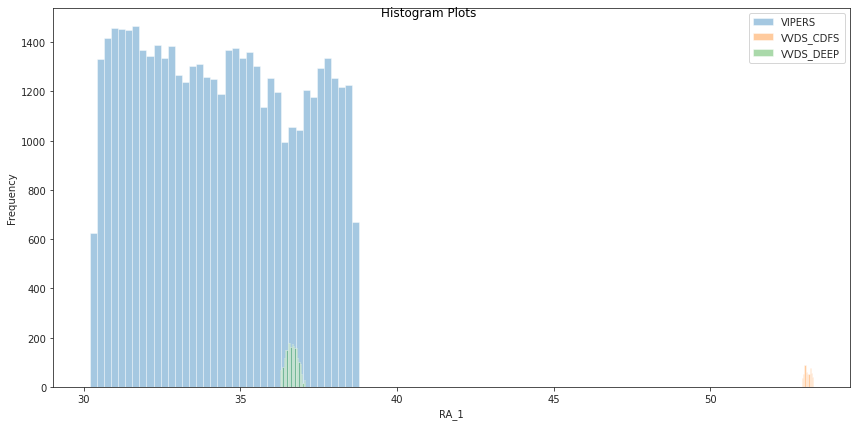

In [ ]:
feat = ['RA_1','DEC_1']
plt.figure(figsize=(12,6))
plt.suptitle('Histogram Plots')
sns.set_style("ticks")
sns.distplot(tab[tab['source']==bytes(b'VIPERS')][feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VIPERS')
sns.distplot(tab[tab['source']==bytes(b'VVDS_CDFS')][feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VVDS_CDFS')
sns.distplot(tab[tab['source']==bytes(b'VVDS_DEEP')][feat[0]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VVDS_DEEP')
plt.legend()
plt.xlabel(feat[0])
plt.ylabel('Frequency')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


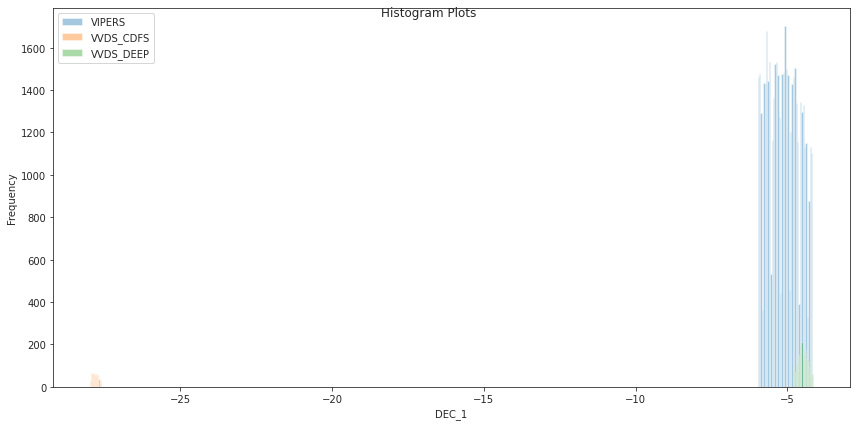

In [ ]:
feat = ['RA_1','DEC_1']
plt.figure(figsize=(12,6))
plt.suptitle('Histogram Plots')
sns.set_style("ticks")
sns.distplot(tab[tab['source']==bytes(b'VIPERS')][feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VIPERS')
sns.distplot(tab[tab['source']==bytes(b'VVDS_CDFS')][feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VVDS_CDFS')
sns.distplot(tab[tab['source']==bytes(b'VVDS_DEEP')][feat[1]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = 'VVDS_DEEP')
plt.legend()
plt.xlabel(feat[1])
plt.ylabel('Frequency')
plt.tight_layout()

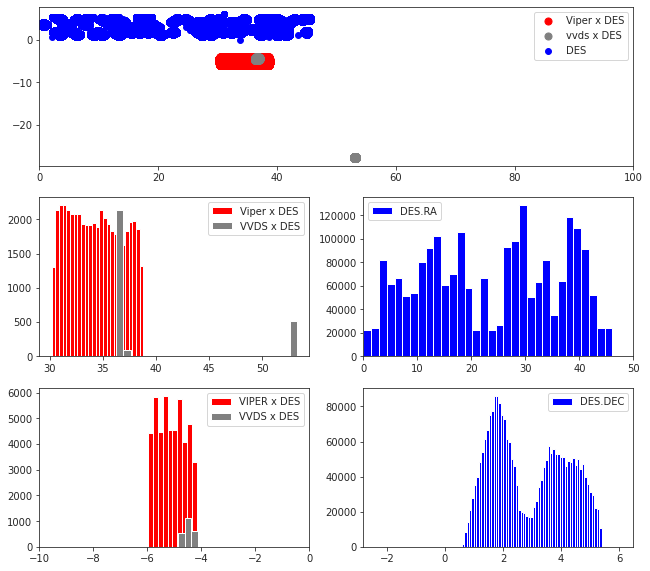

In [ ]:
fig = plt.figure()
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,:])
plt.xlim(0,100)
plt.scatter(viper['RA_1'], viper['DEC_1'], s = 50, color = 'red', label = 'Viper x DES')
plt.scatter(vvds['RA_1'], vvds['DEC_1'], s = 50, color = 'grey', label = 'vvds x DES')
#plt.scatter(tab['RA_1'], tab['DEC_1'], s = 50, color = 'orange', label = 'VVDS/VIPER x DES')
plt.scatter(des['RA'], des['DEC'], s = 35, color = 'blue', label = 'DES')

plt.legend()
ax = plt.subplot(grid[1,0])
plt.hist(viper['RA_1'], label = 'Viper x DES', color = 'red', bins = 25)
plt.hist(vvds['RA_1'], label = 'VVDS x DES', color = 'grey', bins = 25)
#plt.hist(tab['RA_1'], label = 'VVDS/VIPER x DES', color = 'blue', bins = 100)
#plt.hist(des['RA'], label = 'DES', color = 'orange', bins = 100)

plt.legend()
ax = plt.subplot(grid[1,1])
plt.hist(des['RA'], label = 'DES.RA', color = 'blue', bins = 250)
plt.xlim(0,50)
plt.legend()
ax = plt.subplot(grid[2,0])
plt.hist(viper['DEC_1'], label = 'VIPER x DES', color = 'red', bins = 10)
plt.hist(vvds['DEC_1'], label = 'VVDS x DES', color = 'grey', bins = 100)
plt.xlim(-10,-0)
#plt.hist(tab['DEC_1'], label = 'VVDS/VIPER x DES', color = 'orange', bins = 100)
#plt.hist(des['DEC'], label = 'DES', color = 'green', bins = 100)

plt.legend()
ax = plt.subplot(grid[2,1])
plt.hist(des['DEC'], label = 'DES.DEC', color = 'blue', bins = 100)

plt.legend()

### Distribuição de RA e DEC

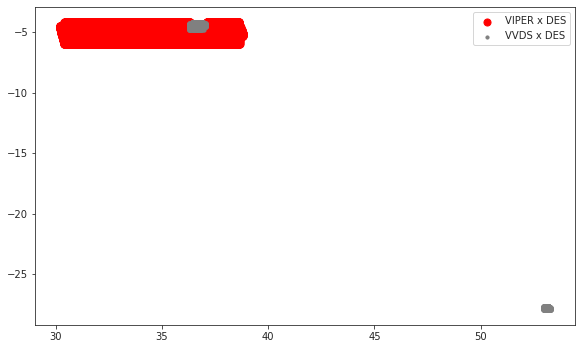

In [ ]:
fig = plt.figure(figsize=(12,8))
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.scatter(viper['RA_1'], viper['DEC_1'], s = 50, color = 'red', label = 'VIPER x DES')
plt.scatter(vvds['RA_1'], vvds['DEC_1'], s = 10, color = 'grey', label = 'VVDS x DES')
#plt.scatter(GD_02['RA_1'], GD_02['DEC_1'], s = 2, color = 'blue', label = 'GAMA x DES')
plt.legend()

Text(0, 0.5, 'DEC')

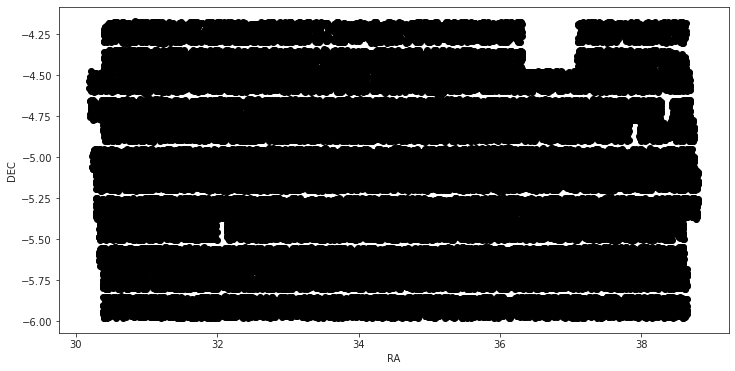

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(viper['RA_1'],viper['DEC_1'],'ko')
plt.xlabel('RA')
plt.ylabel('DEC')

Text(0, 0.5, 'DEC')

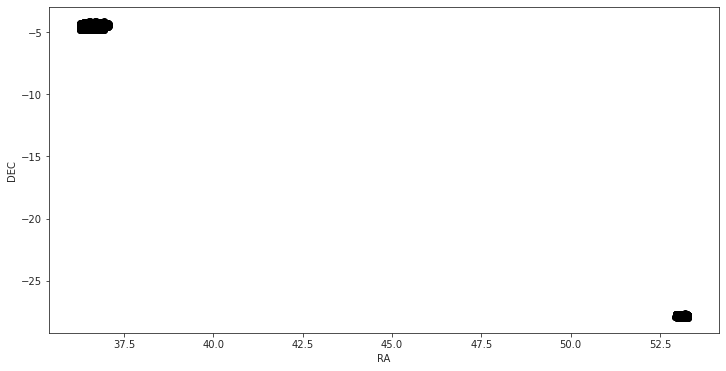

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(vvds['RA_1'],vvds['DEC_1'],'ko')
plt.xlabel('RA')
plt.ylabel('DEC')

Text(0, 0.5, 'DEC')

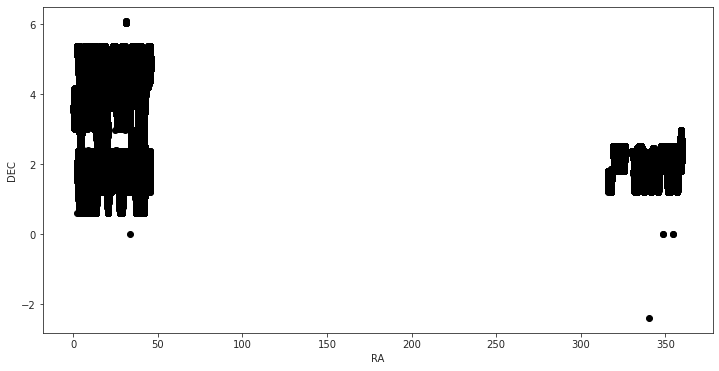

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(des['RA'],des['DEC'],'ko')
plt.xlabel('RA')
plt.ylabel('DEC')

### Mag_auto Plots

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

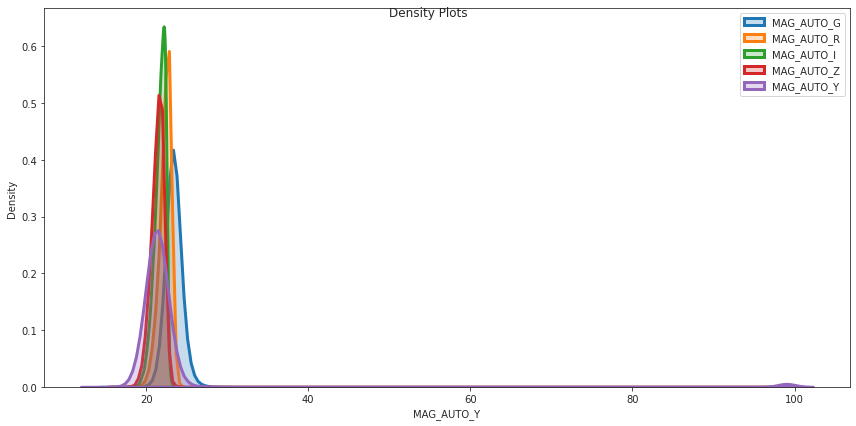

In [ ]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(viper[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

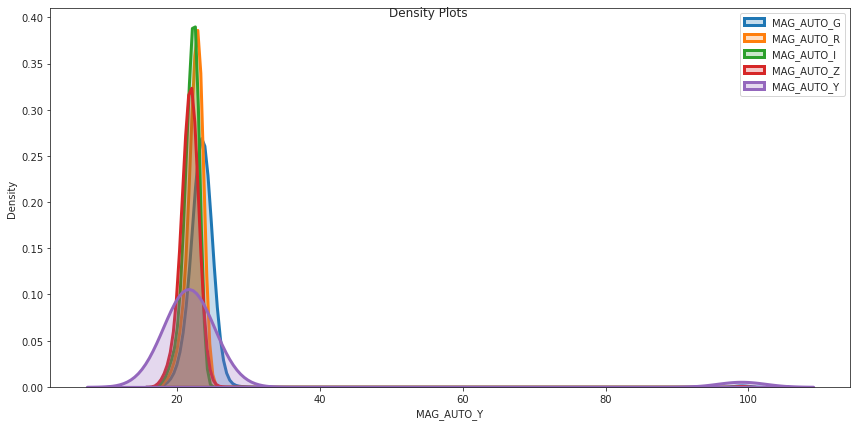

In [ ]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(vvds[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

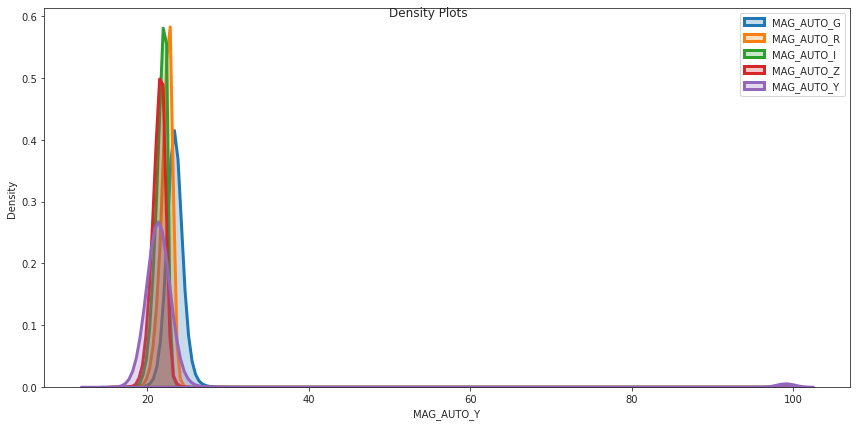

In [ ]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(tab[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

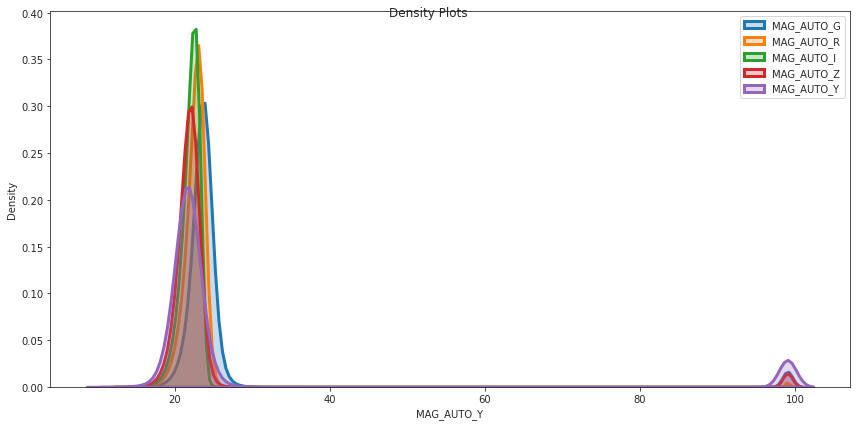

In [ ]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(des[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


### Histograms of the MAG

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


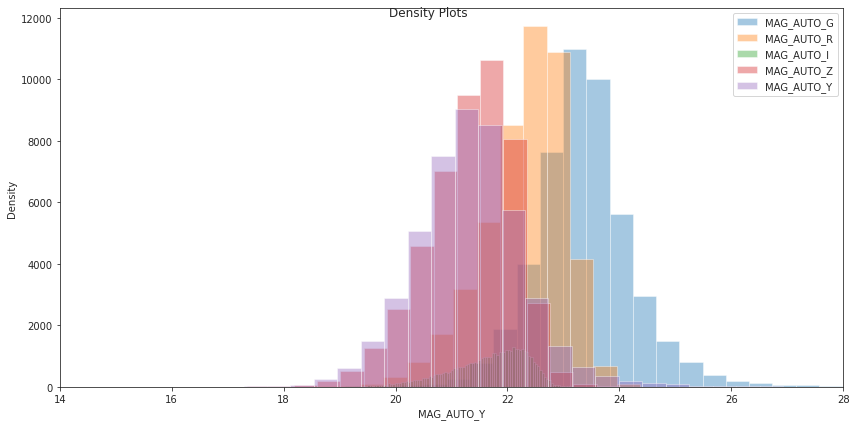

In [ ]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(viper[features[j]], hist = True,bins=200, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.xlim(14,28)
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


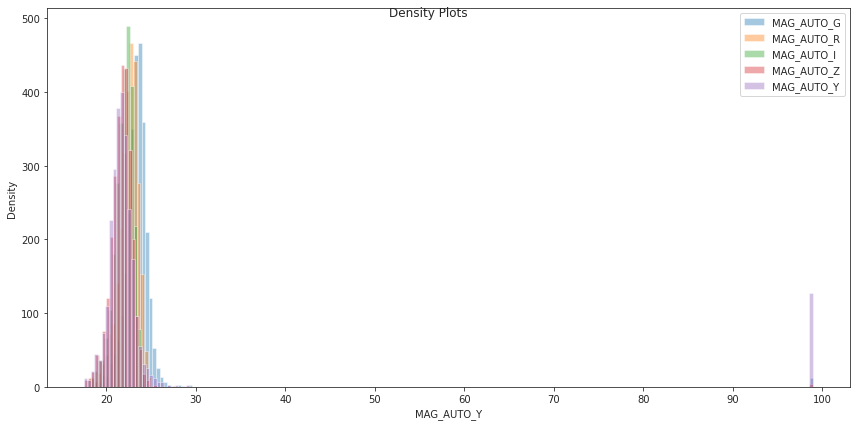

In [ ]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(vvds[features[j]], hist = True,bins=200, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
#plt.xlim(15,24)
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


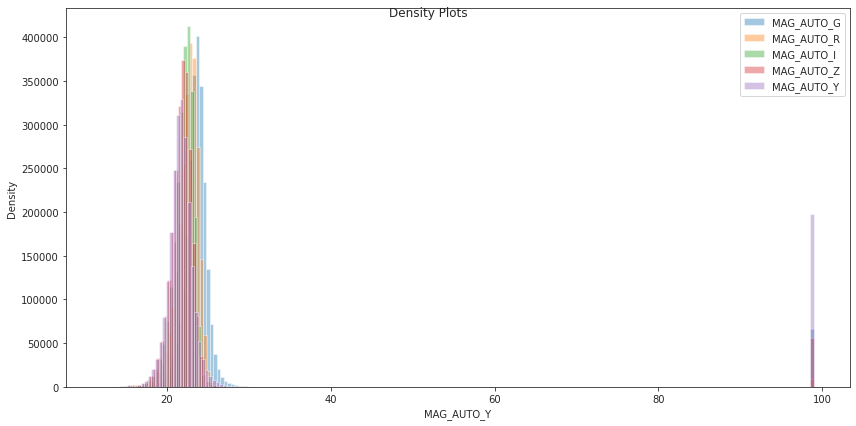

In [ ]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(des[features[j]], hist = True,bins=200, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
#plt.xlim(15,24)
plt.tight_layout()


**Compute the completness between the catalog**

In [ ]:
count1, n1 = np.histogram(viper['MAG_AUTO_R'],bins = np.linspace(0,30,100)) 
count2, n2 = np.histogram(des['MAG_AUTO_R'],bins = np.linspace(0,30,100))
count3, n3 = np.histogram(vvds['MAG_AUTO_R'],bins = np.linspace(0,30,100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


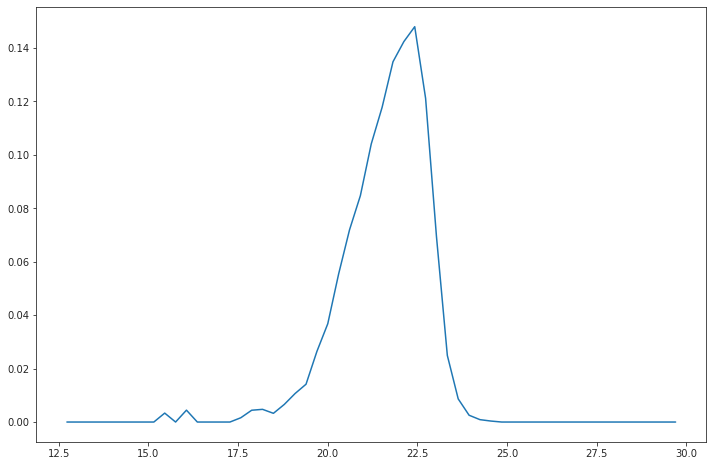

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(n1[:-1],count1/count2)
plt.savefig('completezaVIPER.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


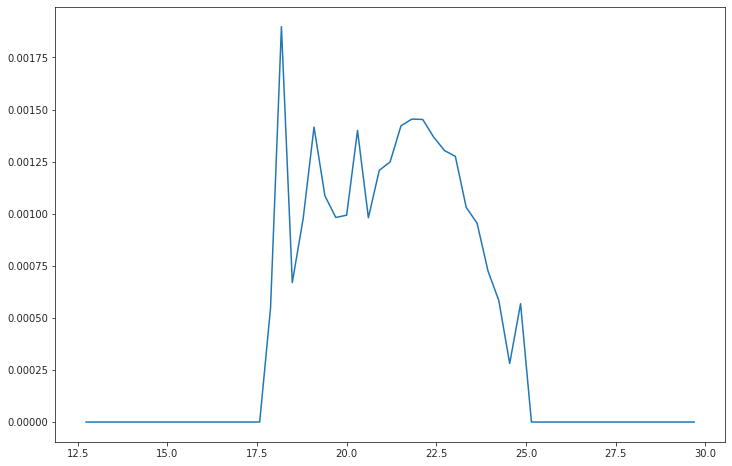

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(n3[:-1],count3/count2)
plt.savefig('completezaVVDS.png')

## Healpix plot

(doubts)

In [ ]:
pix = des['HPIX_1024'].unique()

In [ ]:
num = []
avg = []
for i in range(len(pix)):
  avg.append(des[des['HPIX_1024']==pix[i]]['MAG_AUTO_I'].median())
  num.append(des[des['HPIX_1024']==pix[i]]['MAG_AUTO_I'].count())

In [ ]:
avg = np.asarray(avg)
num = np.asarray(num)

#reshape

#avg = avg.reshape(1,-1)
#num = num.reshape(1,-1)
#pix = pix.reshape(1,-1)

In [ ]:
galaxies = pd.DataFrame(pix,columns=['HPIX_1024'])
galaxies['AVG'] = avg
galaxies['COUNT'] = num

In [ ]:
galaxies.head()

,HPIX_1024,AVG,COUNT
0,4661248,22.028554,110
1,4988056,21.519484,60
2,4988058,21.692896,28
3,4988069,21.794602,22
4,4988067,21.595742,86


In [ ]:
NSIDE = 1024
m = np.zeros(hp.nside2npix(NSIDE))+hp.UNSEEN
m[galaxies.HPIX_1024]=galaxies.COUNT

**Plotting Counting Numbers**

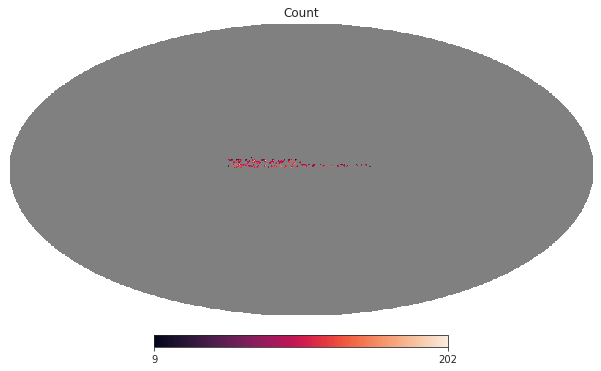

In [ ]:
hp.mollview(m, nest=True, title="Count")